In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
# Load the data
file_path = Path('raw.csv')
consumption_df = pd.read_csv(file_path, header='infer')

# Drop the null columns where all values are null
consumption_df = consumption_df.dropna(axis='columns', how='all')

# Drop the null rows
consumption_df = consumption_df.dropna()

# Show df
consumption_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
# Select useful columns as features for the model
selection = ['school', 'sex', 'age', 'studytime', 'romantic', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

selection_df = consumption_df[selection]
selection_df.head()

,school,sex,age,studytime,romantic,freetime,goout,Dalc,Walc,health
0,GP,F,18,2,no,3,4,1,1,3
1,GP,F,17,2,no,3,3,1,1,3
2,GP,F,15,2,no,3,2,2,3,3
3,GP,F,15,3,yes,2,2,1,1,5
4,GP,F,16,2,no,3,2,1,2,5


In [5]:
# Rename the columns with more descriptive titles
old_names = selection_df.columns

replacements = {
    'Dalc': 'weekday drinker', 'Walc': 'weekend drinker', 'goout': 'social activities', 'romantic': 'significant other', 'freetime': 'free time',  
    'studytime': 'study time','sex': 'gender'
} 

new_names = lambda entry: entry if entry not in replacements else replacements[entry]

new_columns = pd.Series(map(new_names, old_names))
selection_df.columns = new_columns

selection_df.head()

,school,gender,age,study time,significant other,free time,social activities,weekday drinker,weekend drinker,health
0,GP,F,18,2,no,3,4,1,1,3
1,GP,F,17,2,no,3,3,1,1,3
2,GP,F,15,2,no,3,2,2,3,3
3,GP,F,15,3,yes,2,2,1,1,5
4,GP,F,16,2,no,3,2,1,2,5


In [6]:
#adding column totalDrinks to each total amount of drinks consumed between workday and weekend
selection_df['totaldrinks'] = selection_df['weekday drinker'] + selection_df['weekend drinker']
selection_df

,school,gender,age,study time,significant other,free time,social activities,weekday drinker,weekend drinker,health,totaldrinks
0,GP,F,18,2,no,3,4,1,1,3,2
1,GP,F,17,2,no,3,3,1,1,3,2
2,GP,F,15,2,no,3,2,2,3,3,5
3,GP,F,15,3,yes,2,2,1,1,5,2
4,GP,F,16,2,no,3,2,1,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,3,no,4,2,1,2,5,3
1040,MS,F,18,2,no,3,4,1,1,1,2
1041,MS,F,18,2,no,1,1,1,1,5,2
1042,MS,M,17,1,no,4,5,3,4,2,7


In [7]:
#assigning type of drinker (drinks > 4, assigned "1", heavy drinker; drinks <= 4, assigned "0", light drinker)
drinks = [(selection_df['totaldrinks'] <= 4), (selection_df['totaldrinks'] > 4)]
values = ['0', '1']
selection_df['drinker'] = np.select(drinks, values)
selection_df

,school,gender,age,study time,significant other,free time,social activities,weekday drinker,weekend drinker,health,totaldrinks,drinker
0,GP,F,18,2,no,3,4,1,1,3,2,0
1,GP,F,17,2,no,3,3,1,1,3,2,0
2,GP,F,15,2,no,3,2,2,3,3,5,1
3,GP,F,15,3,yes,2,2,1,1,5,2,0
4,GP,F,16,2,no,3,2,1,2,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,3,no,4,2,1,2,5,3,0
1040,MS,F,18,2,no,3,4,1,1,1,2,0
1041,MS,F,18,2,no,1,1,1,1,5,2,0
1042,MS,M,17,1,no,4,5,3,4,2,7,1


In [8]:
index_col = pd.Series(range(1, len(selection_df)+1), name='id')
selection_df = selection_df.join(index_col)
# selection_df = selection_df.set_index('id')

selection_df.head()

,school,gender,age,study time,significant other,free time,social activities,weekday drinker,weekend drinker,health,totaldrinks,drinker,id
0,GP,F,18,2,no,3,4,1,1,3,2,0,1
1,GP,F,17,2,no,3,3,1,1,3,2,0,2
2,GP,F,15,2,no,3,2,2,3,3,5,1,3
3,GP,F,15,3,yes,2,2,1,1,5,2,0,4
4,GP,F,16,2,no,3,2,1,2,5,3,0,5


In [9]:
# replace these values: ['no', 'yes', 'GP', 'MS', 'M', 'F']
#               with:   [  0,    1,     0,    1,   0,   1]

encoded_df = selection_df.replace(['no', 'yes', 'GP', 'MS', 'M', 'F'], [0, 1, 0, 1, 0, 1])
encoded_df

,school,gender,age,study time,significant other,free time,social activities,weekday drinker,weekend drinker,health,totaldrinks,drinker,id
0,0,1,18,2,0,3,4,1,1,3,2,0,1
1,0,1,17,2,0,3,3,1,1,3,2,0,2
2,0,1,15,2,0,3,2,2,3,3,5,1,3
3,0,1,15,3,1,2,2,1,1,5,2,0,4
4,0,1,16,2,0,3,2,1,2,5,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,1,19,3,0,4,2,1,2,5,3,0,1040
1040,1,1,18,2,0,3,4,1,1,1,2,0,1041
1041,1,1,18,2,0,1,1,1,1,5,2,0,1042
1042,1,0,17,1,0,4,5,3,4,2,7,1,1043


In [10]:
# Re-order the dataframes
columns = ['id', 'school', 'gender', 'age', 'study time', 'significant other', 'free time', 'social activities', 'weekday drinker', 'weekend drinker', 'totaldrinks', 'drinker', 'health']
encoded_df = encoded_df[columns]
encoded_df

,id,school,gender,age,study time,significant other,free time,social activities,weekday drinker,weekend drinker,totaldrinks,drinker,health
0,1,0,1,18,2,0,3,4,1,1,2,0,3
1,2,0,1,17,2,0,3,3,1,1,2,0,3
2,3,0,1,15,2,0,3,2,2,3,5,1,3
3,4,0,1,15,3,1,2,2,1,1,2,0,5
4,5,0,1,16,2,0,3,2,1,2,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1040,1,1,19,3,0,4,2,1,2,3,0,5
1040,1041,1,1,18,2,0,3,4,1,1,2,0,1
1041,1042,1,1,18,2,0,1,1,1,1,2,0,5
1042,1043,1,0,17,1,0,4,5,3,4,7,1,2


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

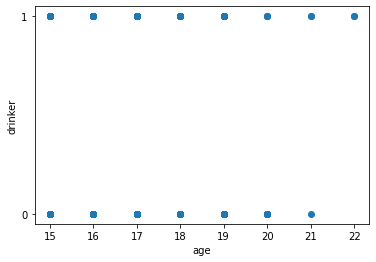

In [22]:
plt.scatter( encoded_df['age'], encoded_df['drinker'])
plt.ylabel('drinker')
plt.xlabel('age')
plt.show()

In [11]:
selection_df.to_csv('../health_outcomes/selection.csv', index=False)
encoded_df.to_csv('../health_outcomes/encoded.csv', index=False)